In [1]:
import sklearn 
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import scipy
import os
import sys
import glob
import numpy as np
from sklearn.externals import joblib
from random import shuffle
import scipy.io.wavfile
from python_speech_features import mfcc

In [2]:
def extract_mfcc_fv(wavfile):
    sampling_rate, song_array = scipy.io.wavfile.read(wavfile)
    """Get MFCC
    ceps  : ndarray of MFCC
    mspec : ndarray of log-spectrum in the mel-domain
    spec  : spectrum magnitude
    """
    ceps=mfcc(song_array)
    #this is done in order to replace NaN and infinite value in array
    bad_indices = np.where(np.isnan(ceps))
    b=np.where(np.isinf(ceps))
    ceps[bad_indices]=0
    ceps[b]=0
    write_mfcc(ceps, wavfile)

# Saves mfcc data 
def write_mfcc(ceps, wavfile):
    base_wav, ext = os.path.splitext(wavfile)
    data_wav = base_wav + ".ceps"
    np.save(data_wav, ceps)
    


In [3]:
def plot_wavfile(wavfile):
    sampling_rate, song_array = scipy.io.wavfile.read(wavfile)
    plt.plot(song_array)    
    plt.ylabel('amplitude')
    plt.xlabel('time')
    plt.title(wavfile)
    plt.show()

In [4]:

def read_wavfiles(genre_list, base_dir):
    X= []
    y=[]
    for label, genre in enumerate(genre_list):
#        for fn in glob.glob(os.path.join(base_dir, genre, "*.ceps.npy")):
        for fn in glob.glob(os.path.join(base_dir, genre, "*.wav")):
            sampling_rate, song_array = scipy.io.wavfile.read(fn)
            num_samples = len(song_array)
            sample_mean = np.mean(song_array)
            sample_variance = np.var(song_array)
            ##print("Length Song:",num_ceps)
            X.append([sample_mean,sample_variance])
            y.append(label)

    print(np.array(X).shape)
    print(len(y))
    return np.array(X), np.array(y)

In [5]:
"""reads MFCC-files and prepares X_train and y_train.
genre_list must consist of names of folders/genres consisting of the required MFCC-files
base_dir must contain genre_list of directories
"""
def extract_fv(genre_list, base_dir):
    X= []
    y=[]
    for label, genre in enumerate(genre_list):
#        for fn in glob.glob(os.path.join(base_dir, genre, "*.ceps.npy")):
        for fn in glob.glob(os.path.join(base_dir, genre, "*.wav")):
            extract_mfcc_fv(fn)
            cepsname = fn[:-3] + "ceps.npy"
            ceps = np.load(cepsname)
            num_ceps = len(ceps)
            X.append(np.mean(ceps[int(num_ceps*1/10):int(num_ceps*9/10)], axis=0))
            #X.append(ceps)
            y.append(label)

    print(np.array(X).shape)
    print(len(y))
    return np.array(X), np.array(y)

In [6]:
def Do_classification(X_train, y_train, X_test, y_test, genre_list):

    print(len(X_train))
    #print(len(X_train[0]))

    #Logistic Regression classifier

    logistic_classifier = linear_model.logistic.LogisticRegression()
    logistic_classifier.fit(X_train, y_train)
    logistic_predictions = logistic_classifier.predict(X_test)
    logistic_accuracy = accuracy_score(y_test, logistic_predictions)
    logistic_cm = confusion_matrix(y_test, logistic_predictions)
    print("logistic accuracy = " + str(logistic_accuracy))
    print("logistic_cm:")
    print(logistic_cm)

    plot_confusion_matrix(logistic_cm, "Confusion matrix", genre_list)


In [7]:
def plot_confusion_matrix(cm, title, genre_list, cmap=plt.cm.RdBu):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(genre_list))
    plt.xticks(tick_marks, genre_list, rotation=45)
    plt.yticks(tick_marks, genre_list)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

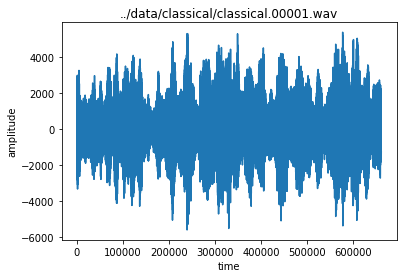

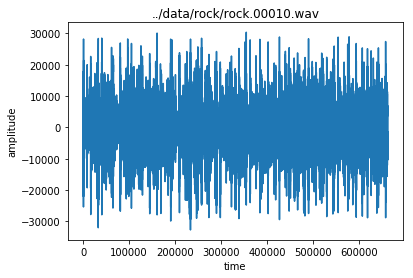

Getting audio samples ... 
(199, 2)
199
Train and test with logistic regression using mean and variance of samples
99
logistic accuracy = 0.49
logistic_cm:
[[49  0]
 [51  0]]


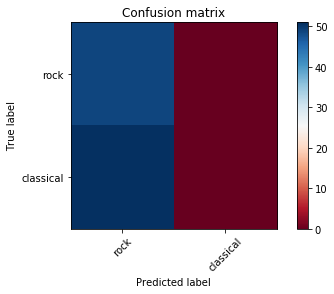

Getting MFCC features
(199, 13)
199
Split into train and test ...
Train and test with logistic regression
99
logistic accuracy = 0.94
logistic_cm:
[[44  5]
 [ 1 50]]


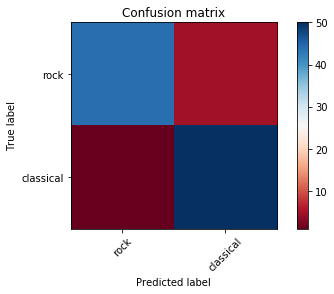

******Done*************


In [11]:

def main():
    base_dir = '../data/'
    
    genre_list = [ "rock","classical"]
    plot_wavfile(base_dir+"classical/classical.00001.wav")
    
    plot_wavfile(base_dir+"rock/rock.00010.wav")
    
    print("Getting audio samples ... ")
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .50)
    
    X1,y1= read_wavfiles(genre_list, base_dir)
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .50,random_state=1)
    print("Train and test with logistic regression using mean and variance of samples")
    Do_classification(X1_train, y1_train, X1_test, y1_test, genre_list)
    
    print("Getting MFCC features")
    X,y= extract_fv(genre_list, base_dir)
    print("Split into train and test ...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .50,random_state=1)
    print("Train and test with logistic regression")
    Do_classification(X_train, y_train, X_test, y_test, genre_list)
    print('******Done*************')
    

if __name__ == "__main__":
    main()